# Tohoku Notebook

## Setup Environment

We assume you have installed `anuga` in your `python` environment. 

### Setup inline graphics and animation

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
#from google.colab import files

%matplotlib inline

# Allow inline jshtml animations
from matplotlib import rc
rc('animation', html='jshtml')

## Tohoku Folder

Change into the Tohoku folder (if you have not done that already)

In [2]:
print(f'Current directory {os.getcwd()}')
try:
    os.chdir('Tohoku')
except:
    pass


Current directory /home/steve/Tohoku


## Create Domain

In [3]:
import anuga


# Create domain
dx = dy = 1000
L = 80000
W = 80000


# Create topography
def topography(x, y):
    el = 20 - x/1000
    return el


domain = anuga.rectangular_cross_domain(int(L/dx), int(W/dy), len1=L, len2=W)

domain.set_name('test')
domain.set_quantity('elevation', function=topography, location='centroids')

## Apply Okada to Stage

Figure files for each frame will be stored in _plot
4.440892098500626e-16 -4.440892098500626e-16
19.833333333333332 -59.83333333333333
59.83333333333333 -19.833333333333332


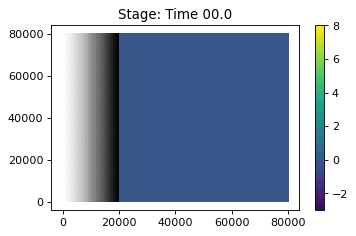

In [9]:
#from anuga.tsunami_source.okada_tsunami import earthquake_source

x0 = 40000.0
y0 = 40000.0
depth = 15000.0
strike = 0.0
dip = 15.0
length = 20000.0
width = 6000.0
slip = 60.0
rake = 90.0
opening = 0.0
nu = 0.25


# Run one instance of the okada KL field as defined by the choice of iseed
#import okada_kl_subfaults as okl
import okada

x = domain.centroid_coordinates[:,0]
y = domain.centroid_coordinates[:,1]

uE,uN,uZ = okada.forward(x,y, xoff=x0, yoff=y0, 
                   depth=depth, length=length, width=width,
                   slip=slip, opening=opening,
                   strike=strike, dip=dip, rake=rake,
                   nu=nu)

    
# The default argument values are appropriate for the Tohoku earth quake
#uE,uN,uZ,slips = okl.deformation(x, y, xoff=300000.0, yoff=250000.0, E_subfault=5, N_subfault=10, iseed=1001)

Elevation = domain.quantities['elevation'].centroid_values
Stage = domain.quantities['stage'].centroid_values

Elevation[:] = Elevation + uZ
Stage[:] = Stage + uZ


dplotter = anuga.Domain_plotter(domain)

print (np.max(dplotter.stage), np.min(dplotter.stage))
print (np.max(dplotter.elev), np.min(dplotter.elev))
print (np.max(dplotter.depth), np.min(dplotter.depth))

dplotter.plot_stage_frame(vmin=-3.0, vmax=8.0)


Figure files for each frame will be stored in _plot


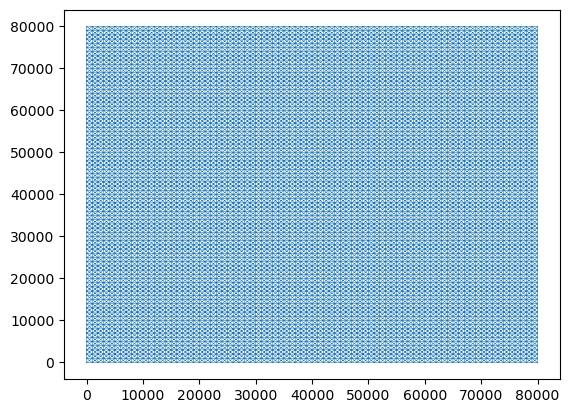

In [10]:
dplotter = anuga.Domain_plotter(domain)
plt.triplot(dplotter.triang, linewidth = 0.4);

In [11]:
Br = anuga.Reflective_boundary(domain)
Bf = anuga.Flather_external_stage_zero_velocity_boundary(domain,lambda t :0.0)
# Boundary conditions
domain.set_boundary({'left': Br,
                         'bottom': Bf,
                         'right': Bf,
                         'top': Bf})

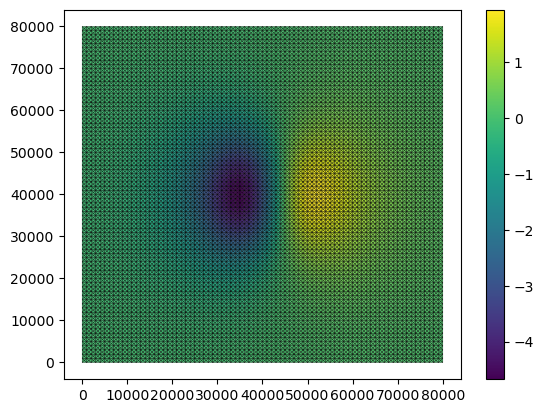

In [12]:
plt.tripcolor(dplotter.triang,
              facecolors = uZ,
              edgecolors='k',
              cmap='viridis')
plt.colorbar();

In [21]:
import time
t0 = time.time()
min = 60
hour = 3600

# Initial run without any event
for t in domain.evolve(yieldstep=5*min, finaltime=2*hour):
    dplotter.save_stage_frame(vmin=-3.0,vmax=8.0)

    domain.print_timestepping_statistics()

print ('That took %.2f seconds' %(time.time()-t0))


/home/steve/anuga_core/anuga/shallow_water/boundaries.py:1161: RuntimeWarning: invalid value encountered in multiply
  w1 = 0.0 - sqrt_g_on_depth_inside * stage_outside
/home/steve/anuga_core/anuga/shallow_water/boundaries.py:1165: RuntimeWarning: invalid value encountered in divide
  (n2 * Xmom.boundary_values[ids] - n1 * Ymom.boundary_values[ids])/depth_inside,
/home/steve/anuga_core/anuga/shallow_water/boundaries.py:1168: RuntimeWarning: invalid value encountered in divide
  w3 = ndotq_inside/depth_inside + sqrt_g_on_depth_inside*Stage.boundary_values[ids]


Time = 0.0000 (sec), steps=0 (23s)
Time = 300.0000 (sec), delta t in [6.17101569, 6.18161110] (s), steps=49 (1s)
Time = 600.0000 (sec), delta t in [6.16523871, 6.17095739] (s), steps=49 (1s)
Time = 900.0000 (sec), delta t in [6.15897218, 6.16515469] (s), steps=49 (1s)
Time = 1200.0000 (sec), delta t in [6.15677056, 6.15889652] (s), steps=49 (1s)
Time = 1500.0000 (sec), delta t in [6.15702867, 6.16926800] (s), steps=49 (1s)
Time = 1800.0000 (sec), delta t in [6.09937659, 6.17448376] (s), steps=49 (1s)
Time = 2100.0000 (sec), delta t in [6.04087232, 6.09748376] (s), steps=50 (1s)
Time = 2400.0000 (sec), delta t in [6.04090026, 6.07550809] (s), steps=50 (1s)
Time = 2700.0000 (sec), delta t in [6.07593576, 6.11018653] (s), steps=50 (1s)
Time = 3000.0000 (sec), delta t in [6.11032578, 6.13267446] (s), steps=49 (1s)
Time = 3300.0000 (sec), delta t in [6.13295336, 6.14698606] (s), steps=49 (1s)
Time = 3600.0000 (sec), delta t in [6.14720607, 6.15979701] (s), steps=49 (1s)
Time = 3900.0000 (se

In [22]:
dplotter.make_stage_animation()